In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data=df.copy()
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [8]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [9]:
data.shape

(50000, 14)

In [10]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [12]:
data['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [13]:
data['num_passengers'].sum()

79562

In [14]:
data['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

sales_channel
Internet    44382
Mobile       5618
Name: num_passengers, dtype: int64


<AxesSubplot:ylabel='sales_channel'>

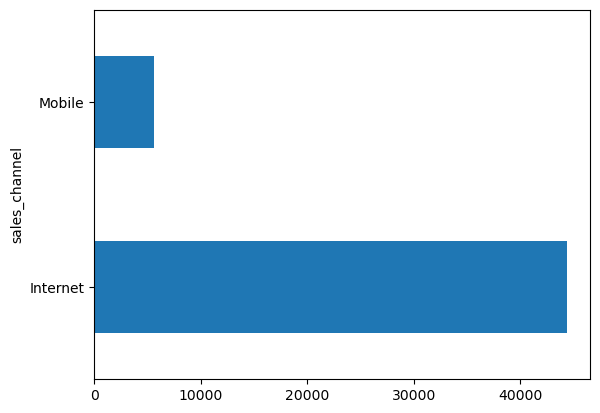

In [15]:
print(data.groupby(['sales_channel'])['num_passengers'].count())
data.groupby(['sales_channel'])['num_passengers'].count().plot.barh()

In [16]:
data['flight_day'].value_counts().sort_values(ascending=False)

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [17]:
data.groupby(['flight_day'])['num_passengers'].sum().sort_values(ascending=False)

flight_day
Mon    12933
Wed    12118
Tue    12055
Thu    11699
Sun    10842
Fri    10528
Sat     9387
Name: num_passengers, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['flight_day']=le.fit_transform(data['flight_day'])
data['sales_channel']=le.fit_transform(data['sales_channel'])
data['trip_type']=le.fit_transform(data['trip_type'])
data['route']=le.fit_transform(data['route'])
data['booking_origin']=le.fit_transform(data['booking_origin'])

In [19]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [20]:
df.groupby(['flight_day', 'route'])['num_passengers'].sum()

flight_day  route 
Fri         AKLDEL      1
            AKLICN     18
            AKLKIX      1
            AKLKTM      1
            AKLKUL    565
                     ... 
Wed         SYDXIY      2
            TGGTPE      7
            TPETRZ      3
            TWUWUH      2
            TWUXIY      1
Name: num_passengers, Length: 4251, dtype: int64

In [21]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [22]:
df.groupby(['route','flight_day'])['num_passengers'].sum().sort_values(ascending=False)[0:20] #monday look like a lot of flight

route   flight_day
AKLKUL  Sun           798
        Wed           709
        Tue           677
        Mon           673
        Fri           565
        Thu           542
        Sat           486
PENTPE  Tue           257
DMKKIX  Sun           251
        Mon           242
PENTPE  Thu           240
ICNSIN  Mon           239
DPSICN  Tue           235
PENTPE  Wed           227
        Fri           225
        Mon           221
MELSGN  Thu           221
ICNSIN  Tue           218
DMKKIX  Wed           217
DPSICN  Mon           212
Name: num_passengers, dtype: int64

<AxesSubplot:>

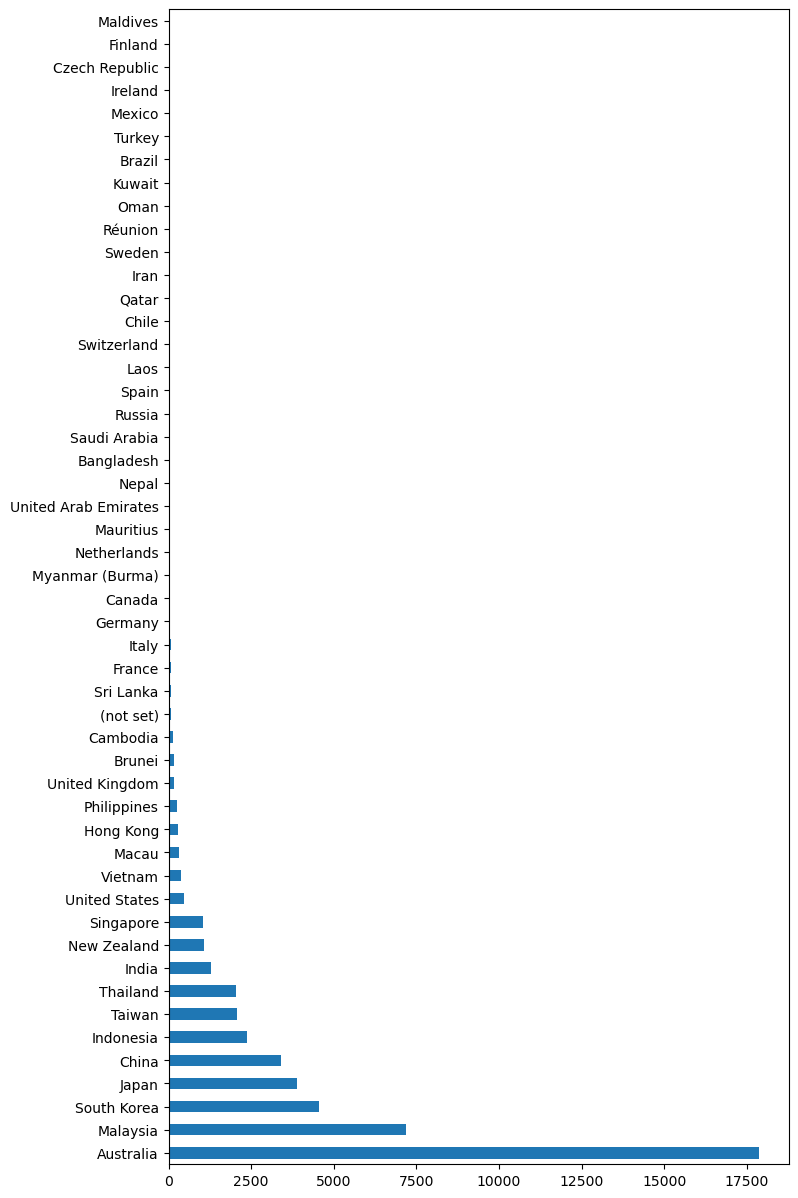

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 15))
df['booking_origin'].value_counts().sort_values(ascending=False)[0:50].plot.barh()

In [24]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


# Machine learning modelling

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [26]:
feature=data.iloc[:,0:13]
feature.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52


In [27]:
target=data.iloc[:,13]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(feature, target , test_size=0.2 ,random_state=50)

In [29]:
model1=GaussianNB()
model1.fit(x_train , y_train)

GaussianNB()

In [30]:
from sklearn.metrics import accuracy_score
y_pred=model1.predict(x_test)
accuracy_score(y_pred,y_test)

0.8357

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(model1 , x_test , y_test , cv=10).mean()

0.8167

In [33]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [34]:
#actually this isnt new sample this row from data the first row
new_sample=[['2' , '0' , '2' , '262' , '19' , '7' , '2' , '0' , '61' , '1' , '0' , '0' , '5.52']]

In [35]:
model1.predict(new_sample) #and result is the same as data conclusion

C:\anaconda_2022\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\anaconda_2022\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([0], dtype=int64)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model2=RandomForestClassifier().fit(x_train,y_train)

In [38]:
y_pred=model2.predict(x_test)

In [39]:
accuracy_score(y_pred, y_test)

0.8552

In [40]:
?model2

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\anaconda_2022\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the in

In [41]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 10],
              'min_samples_split':[2,5,10]}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
model2_tuned=GridSearchCV(model2,param_grid , cv=10 , n_jobs=-1 , verbose=2)

In [44]:
model2_tuned.fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [45]:
model2_tuned.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [46]:
model2_tuned=RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [47]:
model2_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [48]:
y_pred=model2_tuned.predict(x_test)

In [49]:
accuracy_score(y_pred,y_test)

0.8532

In [50]:
#you can see RandomForest model is gooder than Naive bayes algprthm with little difference

In [51]:
new_sample=[['2' , '0' , '2' , '262' , '19' , '7' , '2' , '0' , '61' , '1' , '0' , '0' , '5.52']]

In [53]:
#very good model is tuned and it is orking good
model2_tuned.predict(new_sample)

C:\anaconda_2022\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [66]:
feature_important=(model2_tuned.feature_importances_)
feature_important

array([0.02586833, 0.01710761, 0.00243272, 0.09220403, 0.10540115,
       0.05854037, 0.03375122, 0.14999409, 0.33342758, 0.03463019,
       0.02525277, 0.01942412, 0.10196582])

In [60]:
import seaborn as sns

In [67]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model2_tuned, x_test, y_test, n_repeats=10, random_state=0)

# Print the feature importances
for i, feature_name in enumerate(data.columns):
    print(f'{feature_name}: {result.importances[i].mean()}')


num_passengers: 0.0002799999999999692
sales_channel: 0.00010999999999998789
trip_type: 7.999999999999118e-05
purchase_lead: -7.000000000004781e-05
length_of_stay: 0.00014999999999997237
flight_hour: 8.999999999999009e-05
flight_day: 3.999999999998449e-05
route: -0.0002500000000000502
booking_origin: -0.00022000000000004237
wants_extra_baggage: -3.3306690738754695e-17
wants_preferred_seat: -0.0001500000000000501
wants_in_flight_meals: -7.00000000000145e-05
flight_duration: 0.00021999999999997578


IndexError: index 13 is out of bounds for axis 0 with size 13

In [68]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')